In [2]:
import numpy as np
from qiskit import QuantumCircuit,transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator

Firstly, I have made a code to to show the basic Quantum Entanglement using the program before going explicitly into the Bell test. So, I have taken 4 bits, 2 Quantum and 2 classcial to store the results. Then I applied a CNot gate which functions as it flips the target qubit (1 → 0, 0 → 1) only if the control qubit = 1. So, we techically have 4 basis states : 00,01,10,11. If they are entangled, the results would be 50/50 in the sense, it would be either be 11 or 00.

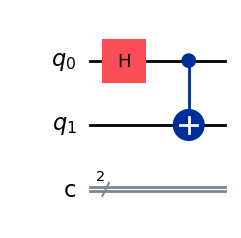

In [3]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

In [17]:
fig = qc.draw('mpl')
fig.savefig("circuit.png", dpi=300, bbox_inches='tight')


As the system collapses each time we make a measurement, the system was simulated 1e4 times and then each time, measurement was taken and then the complete results for the same was counted. The results came out to be nearly 50/50 as expected.

In [4]:
qc.measure([0, 1], [0, 1])
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1e4).result()
counts = result.get_counts()
print(counts)

{'00': 5102, '11': 4898}


For the Bell Test Simulation, the circuit is defined again as a function. 2 Qubits for the Alice and Bob. 

In [5]:
def bell_test(theta_a, theta_b):
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    
    # Rotating the axes
    qc.ry(-1*theta_a, 0)
    qc.ry(-1*theta_b, 1)
    
    # Measure
    qc.measure([0, 1], [0, 1])
    
    # Run simulation
    sim = AerSimulator()
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1e4).result()
    counts = result.get_counts()
    return counts

In [6]:
def expectation(counts):
    total = sum(counts.values())
    exp = 0
    for state, c in counts.items():
        if state in ['00', '11']:
            exp += c/total
        else:
            exp -= c/total
    return exp

In [7]:
angles = [
    (0, np.pi/8),        # (a, b)
    (0, 3*np.pi/8),      # (a, b')
    (np.pi/4, np.pi/8),  # (a', b)
    (np.pi/4, 3*np.pi/8) # (a', b')
]

In [8]:
results = []
expectations = []

In [9]:
for theta_a, theta_b in angles:
    counts = bell_test(theta_a, theta_b)
    results.append(counts)
    e = expectation(counts)
    expectations.append(e)


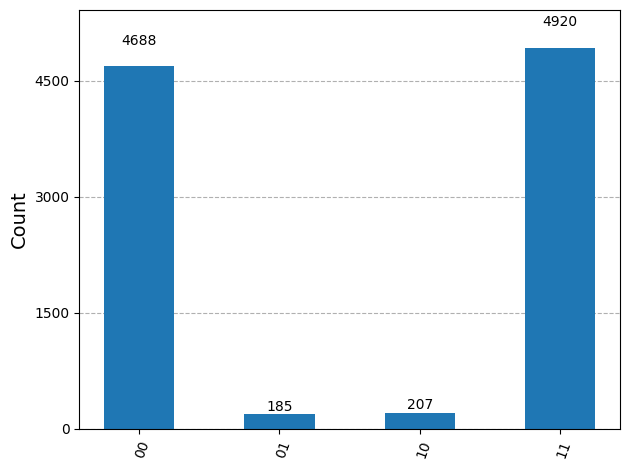

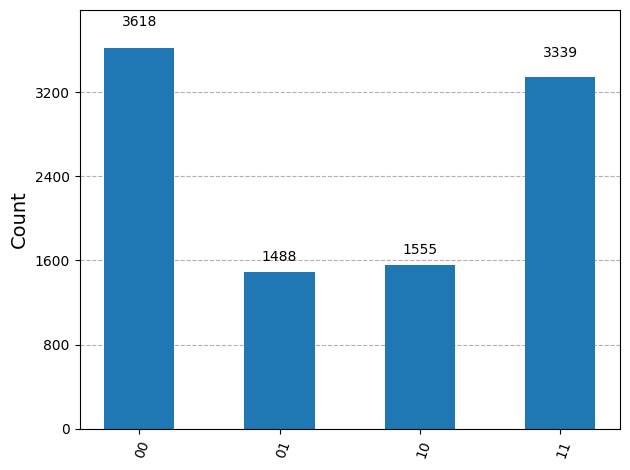

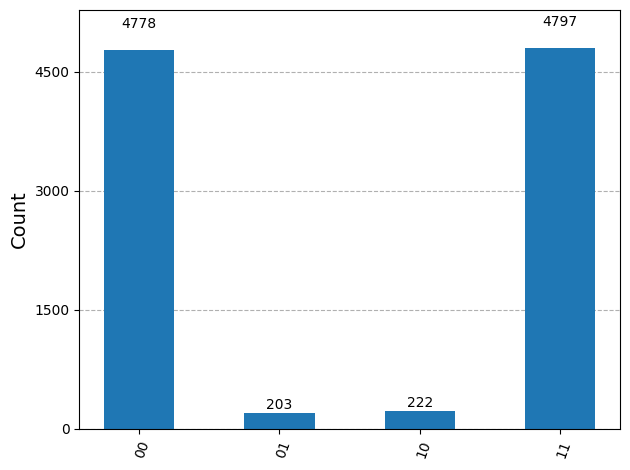

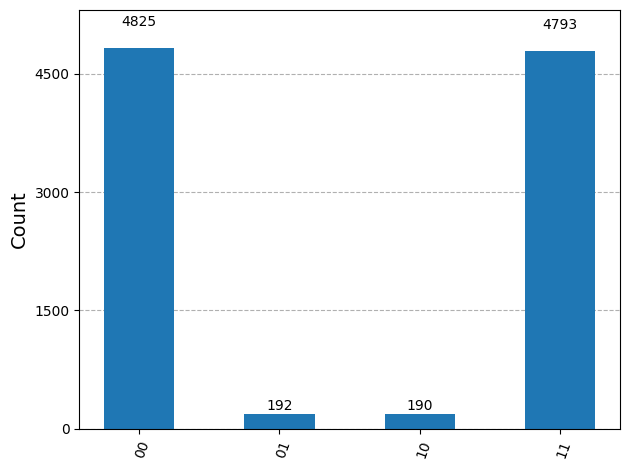

In [10]:
from qiskit.visualization import plot_histogram
for counts in results:
    display(plot_histogram(counts))

S=E(A1,B1)+E(A1,B2)+E(A2,B1)−E(A2,B2)

In [16]:
for i, counts in enumerate(results):
    fig = plot_histogram(counts)
    fig.savefig(f"histogram_{i}.png")

In [13]:
S = abs(expectations[0] - expectations[1] + expectations[2] + expectations[3])
print("Expectation values:", expectations)
print("CHSH S =", S)
print(" Bell Violation" if S > 2 else "No violation")

Expectation values: [0.9216, 0.3914, 0.915, 0.9236]
CHSH S = 2.3688000000000002
 Bell Violation
